Size of data analyzed for Data Scientist jobs in Redwood City = 1285.034000 MB


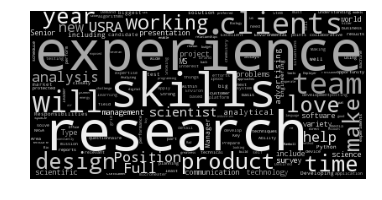

In [28]:
import requests
import sys
import re
import time
from bs4 import BeautifulSoup

def job_skills(url,q,l,radius,stop):
    
    jobs = []
    data = {"q": q, "l": l, "radius": radius} 
    time.sleep(20)
    response = requests.get(url+"/jobs",params=data)
    soup = BeautifulSoup(response.text,'lxml')
    pages = soup.findAll(attrs={"name":"description"}) 
    page = re.findall('\d+', str(pages))
    
    for p in range(1,int(page[0])//10+1):
        # delay to prevent being blocked while scraping data
        time.sleep(20)
        data = {"q": q, "l": l, "radius": radius, "page": p} 
        response = requests.get(url+"/jobs",params=data)
        soup = BeautifulSoup(response.text,'lxml')
        links = [h3.find('a') for h3 in soup.findAll("h3", class_="itemTitle")]
    
        for i in range(len(links)):
            jobs.append(links[i].attrs['href'])

    skills = []
    for i in range(len(jobs)):
        job_response = requests.get(url+jobs[i])
        job_soup = BeautifulSoup(job_response.text,'lxml')
        skill = [div.findAll('p') for div in job_soup.findAll("div", class_="normalText")]
        skills.append(skill)
    
    skills_str = ''.join(map(str, skills))
    clean_soup = BeautifulSoup(skills_str,'lxml')
    clean_skills = clean_soup.getText()

    size = sys.getsizeof(clean_skills)/1000;
    print("Size of data analyzed for %s jobs in %s = %f MB" % (q,l,size))

    # Visualizing job description text using a word cloud
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    %matplotlib inline
    import random

    def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

    wordcloud = WordCloud(stopwords=STOPWORDS.add(stop)).generate(clean_skills)

    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis('off')
    plt.show()


def main():
    
    url = "https://www.postjobfree.com"
    
    q = "Imaging Data Scientist"
    l = "Redwood City"
    radius = 25
    stop = "work"
    job_skills(url,q,l,radius,stop)

    q = "Health Data Scientist"
    stop = "data"
    job_skills(url,q,l,radius,stop)
    
    q = "Data Scientist"
    stop = "required"
    job_skills(url,q,l,radius,stop)

if __name__ == "__main__":
    main()